In [17]:
!pip install textblob

In [11]:
import tweepy
import csv 
import pandas as pd
import webbrowser
import json
from matplotlib import pyplot as plt
%matplotlib inline 
from textblob import TextBlob
import time

1606655292.822574

AUTHORIZATION


In [12]:
def authorize():
    consumer_key = 'H0UI7C1LSaJhIPAjDQUCsqHNH'
    consumer_secret = '1DMn55Q7Xx7FXA35vnJ5n6mNBvvpIJVkiFsTOyNdUxsSRfrqZ2'
    callback_uri = 'oob'
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret,callback_uri)
    redirect_url = auth.get_authorization_url()
    webbrowser.open(redirect_url)
    pin = input('Enter pin:') 
    auth.get_access_token(pin)
    api = tweepy.API(auth)
    return api

In [13]:
api = authorize()

Enter pin:4441136


SEARCH TWEETS BASED ON HASHTAG

In [153]:
def search_tweets(hashtag):
    with open('tweets.csv','w',newline ='') as file:
        writer = csv.writer(file)
        writer.writerow(['timestamp','tweet_text','username','all_hashtags'])
        for tweet in tweepy.Cursor(api.search, q = hashtag +' -filter:retweets', \
                                   lang="en", tweet_mode='extended').items(100):
            writer.writerow([tweet.created_at, tweet.full_text.replace('\n',' ').encode('utf-8'), tweet.user.screen_name.encode('utf-8'), [e['text'] for e in tweet._json['entities']['hashtags']]])

In [154]:
search_tweets('#ggmu AND #mufc')

In [134]:
with open('tweets_stream.csv','w',newline ='') as f:
    w = csv.writer(f)
    w.writerow(['timestamp','tweet_text','username','hashtags'])

STREAMING TWEETS BASED ON KEY WORDS

In [14]:
class StreamListener(tweepy.StreamListener):
    def __init__(self,duration):
        super().__init__()
        self.f = open('united-leeds.log','a')
        self.count = 0
        self.start_time = time.time()
        self.end_time = self.start_time + duration
    def on_status(self,status):
        self.process_data(status)
        self.count += 1
        if(time.time() > self.end_time):
            self.f.close()
            return False
    def process_data(self,status):
            self.f.write(json.dumps(status._json))
            self.f.write('\n')
    def on_error(self,status_code):
        if status_code == 420:
            return False

In [15]:
def stream_tweets(hashtag_list,duration):
    myStreamListener = StreamListener(duration)
    myStream = tweepy.Stream(auth = api.auth, listener= myStreamListener )
    myStream.filter(track = hashtag_list)

In [19]:
stream_tweets(['Manchester United','Leeds United','Premier League','Football','Goal','Bruno Fernandes','Bruno','Rashford','MUNLEE','assist','Bamford','GGMU','PL','VAR','FPL'],120*60)

In [52]:
print('h')

h


ANALYSIS OF TWEET DATA

In [20]:
df = pd.read_json('united-leeds.log',orient='records',lines = True)
df.size

13152094

In [63]:
df.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,contributors,quote_count,reply_count,retweet_count,favorite_count,possibly_sensitive,quoted_status_id,quoted_status_id_str
count,2.068160e+05,2.068160e+05,3.317500e+04,3.317500e+04,3.485200e+04,3.485200e+04,0.0,206816.0,206816.0,206816.0,206816.0,41443.000000,3.392800e+04,3.392800e+04
mean,1.333061e+18,1.333061e+18,1.332323e+18,1.332323e+18,5.076719e+17,5.076719e+17,NaN,0.0,0.0,0.0,0.0,0.043337,1.331032e+18,1.331032e+18
std,5.842582e+12,5.842582e+12,2.066739e+16,2.066739e+16,5.692858e+17,5.692858e+17,NaN,0.0,0.0,0.0,0.0,0.203616,2.798736e+16,2.798736e+16
min,1.333049e+18,1.333049e+18,4.010013e+09,4.010013e+09,9.200000e+01,9.200000e+01,NaN,0.0,0.0,0.0,0.0,0.000000,2.454447e+17,2.454447e+17
25%,1.333056e+18,1.333056e+18,1.333047e+18,1.333047e+18,3.436272e+08,3.436272e+08,NaN,0.0,0.0,0.0,0.0,0.000000,1.332981e+18,1.332981e+18
50%,1.333061e+18,1.333061e+18,1.333057e+18,1.333057e+18,3.065789e+09,3.065789e+09,NaN,0.0,0.0,0.0,0.0,0.000000,1.333052e+18,1.333052e+18
75%,1.333066e+18,1.333066e+18,1.333062e+18,1.333062e+18,1.142889e+18,1.142889e+18,NaN,0.0,0.0,0.0,0.0,0.000000,1.333059e+18,1.333059e+18
max,1.333071e+18,1.333071e+18,1.333071e+18,1.333071e+18,1.333063e+18,1.333063e+18,NaN,0.0,0.0,0.0,0.0,1.000000,1.333071e+18,1.333071e+18


In [5]:
df.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,retweeted_status,display_text_range,extended_tweet,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,withheld_in_countries
0,2020-11-29 14:02:57+00:00,1333048808322830338,1333048808322830336,Allam bi kulun var konuyuda biliyorsun..,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-29 14:02:57+00:00,1333048808406659073,1333048808406659072,RT @goal: 🇦🇷 7 games\n⚽️ 5 goals\n🅰️ 5 assists...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,{'created_at': 'Sun Nov 29 12:12:00 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-11-29 14:02:57+00:00,1333048808482238466,1333048808482238464,"Fuck your tippy tappy football, long ball for ...","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-11-29 14:02:57+00:00,1333048808629014532,1333048808629014528,Bi insan var yemin ediyorum sırf o seviyor diy...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-11-29 14:02:57+00:00,1333048808305876994,1333048808305876992,Southampton vs Man Utd\n\nLive HD Stream\n\nMo...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,NaN,NaN,NaN,...,NaN,"[0, 140]",{'full_text': 'Southampton vs Man Utd Live HD...,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.index = pd.to_datetime(df.created_at)


<AxesSubplot:xlabel='created_at'>

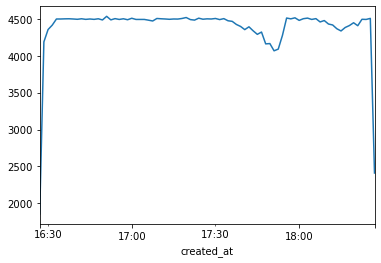

In [22]:
df.resample('90S').size().plot()

In [20]:
blobs = []
for i in range(0,100):
    blob = TextBlob(df.text[i])
    print(blob.sentiment)
    blobs.append(blob)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.15, subjectivity=0.65)
Sentiment(polarity=-0.033333333333333326, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.13333333333333333, subjectivity=0.7999999999999999)
Sentiment(polarity=0.55, subjectivity=0.6916666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.55, subjectivity=0.6916666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=-0.13333333333333333, subjectivity=0.16666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)
Sentiment(polarity=0.48333333333333334, subjectivity=0